In [1]:
import pandas as pd
from umap import UMAP
import seaborn as sns
import japanize_matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
%cd ~/thesis
from data_prep.topic_modeling.process_articles import *

articles = load_articles()

articles.head()

/Users/jakeunderland/thesis


,date,title,text,publication
0,2020-01-17,新型肺炎：神奈川の男性、新型肺炎 国内初確認 武漢渡航、既に退院,厚生労働省は１６日、中国の武漢市に滞在歴のある神奈川県在住の３０代男性が肺炎の症状を起こし...,mainichi
1,2020-01-21,新型肺炎：新型肺炎 ヒトからヒト確認 中国で死者３人、感染２００人超,中国湖北省武漢市の衛生当局は２０日、２０１９年末から集団感染の広がる新型コロナウイルスによ...,mainichi
2,2020-01-21,ヒトからヒトへ、新型肺炎が感染 中国明言,中国中部の湖北省武漢市で集団発生している新型コロナウイルスによる肺炎をめぐり、中国政府の専門...,asahi
3,2020-01-22,新型肺炎 出入り制限 中国・武漢 人から人 感染確認 死者６人に,【上海＝南部さやか】中国湖北省武漢市を中心に多発する新型コロナウイルスによる肺炎で、武漢市...,yomiuri
4,2020-01-22,新型肺炎：新型肺炎 上海から入国も体調申告を要請 政府対応強化,政府は２１日、対策を協議する関係閣僚会議を開いた。武漢に加え、上海からの入国者に、体調や薬...,mainichi


In [5]:
# preprocess data for topic modeling 

# get rid of ubiquitous terms 
articles_cleaned = articles.replace("新型コロナ", "")
articles_cleaned = articles_cleaned.replace("新型肺炎", "")

In [6]:
docs = list(articles["title"])

# non stochastic behavior 
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

model = topic_modeling_bert(docs, umap_model)

model.doc_info

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2023-01-29 13:28:27,494 - BERTopic - Transformed documents to Embeddings
2023-01-29 13:28:32,762 - BERTopic - Reduced dimensionality
2023-01-29 13:28:32,861 - BERTopic - Clustered reduced embeddings
2023-01-29 13:28:33,871 - BERTopic - Reduced number of topics from 31 to 16


,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,新型肺炎：神奈川の男性、新型肺炎 国内初確認 武漢渡航、既に退院,0,0_新型肺炎_新型コロナ_首相_緊急事態,新型肺炎 - 新型コロナ - 首相 - 緊急事態 - 政府 - 緊急事態宣言 - コロナ -...,1.000000,False
1,新型肺炎：新型肺炎 ヒトからヒト確認 中国で死者３人、感染２００人超,0,0_新型肺炎_新型コロナ_首相_緊急事態,新型肺炎 - 新型コロナ - 首相 - 緊急事態 - 政府 - 緊急事態宣言 - コロナ -...,0.900714,False
2,ヒトからヒトへ、新型肺炎が感染 中国明言,0,0_新型肺炎_新型コロナ_首相_緊急事態,新型肺炎 - 新型コロナ - 首相 - 緊急事態 - 政府 - 緊急事態宣言 - コロナ -...,1.000000,False
3,新型肺炎 出入り制限 中国・武漢 人から人 感染確認 死者６人に,0,0_新型肺炎_新型コロナ_首相_緊急事態,新型肺炎 - 新型コロナ - 首相 - 緊急事態 - 政府 - 緊急事態宣言 - コロナ -...,0.282027,False
4,新型肺炎：新型肺炎 上海から入国も体調申告を要請 政府対応強化,0,0_新型肺炎_新型コロナ_首相_緊急事態,新型肺炎 - 新型コロナ - 首相 - 緊急事態 - 政府 - 緊急事態宣言 - コロナ -...,0.500511,False
...,...,...,...,...,...,...
2018,遠山元公明議員、在宅起訴 コロナ融資など仲介 無登録で１１１件,-1,-1_新型コロナ_新型肺炎_政府_トランプ氏,新型コロナ - 新型肺炎 - 政府 - トランプ氏 - 毎日新聞世論調査 - 首相 - その...,0.740038,False
2019,新型コロナ：新型コロナ 「オミクロン株、急拡大も」 専門家組織、対策呼びかけ,-1,-1_新型コロナ_新型肺炎_政府_トランプ氏,新型コロナ - 新型肺炎 - 政府 - トランプ氏 - 毎日新聞世論調査 - 首相 - その...,0.564679,False
2020,新型コロナ：新型コロナ 首相「先手対応」,0,0_新型肺炎_新型コロナ_首相_緊急事態,新型肺炎 - 新型コロナ - 首相 - 緊急事態 - 政府 - 緊急事態宣言 - コロナ -...,0.642852,False
2021,世界の感染最多、９３万人、１カ月で６割増、死者数は横ばい。,0,0_新型肺炎_新型コロナ_首相_緊急事態,新型肺炎 - 新型コロナ - 首相 - 緊急事態 - 政府 - 緊急事態宣言 - コロナ -...,0.271996,False


In [7]:
model.model.get_topic_info()

,Topic,Count,Name
0,-1,463,-1_新型コロナ_新型肺炎_政府_トランプ氏
1,0,888,0_新型肺炎_新型コロナ_首相_緊急事態
2,1,221,1_東京_新型コロナ_大阪_東京五輪
3,2,144,2_コロナワクチン_ワクチン_新型コロナ_ワクチン接種
4,3,56,3_６月_基準地価_ｇｄｐ_３月
5,4,48,4_新型コロナ_協力金を追加支給_時短拒否_自公合意
6,5,39,5_新型コロナ_地域に_コロナ危機と世界_政府
7,6,32,6_コロナ_ペース加速_国内死者５０００人超_新型コロナ
8,7,24,7_４割_需要急減_飲食で４割_民間調べ
9,8,18,8_タカラバイオ_ｐｃｒ_ｐｃｒ検査_海外渡航に必要な例も


In [8]:
model.topic_features


{-1: [('新型コロナ', 0.03945435622419909),
  ('新型肺炎', 0.03512716598487019),
  ('政府', 0.02087684217892696),
  ('トランプ氏', 0.019203930686297253),
  ('毎日新聞世論調査', 0.016603884694122672),
  ('首相', 0.01565522232827912),
  ('その１', 0.015428388120808621),
  ('コロナ禍', 0.013955765610960343),
  ('コロナの先の２０３０', 0.01326658760853119),
  ('札幌', 0.01326658760853119)],
 0: [('新型肺炎', 0.05837509586642937),
  ('新型コロナ', 0.05744082618950441),
  ('首相', 0.026549396105891646),
  ('緊急事態', 0.02214455268170127),
  ('政府', 0.02132260283171299),
  ('緊急事態宣言', 0.018869111600377766),
  ('コロナ', 0.016317663130905467),
  ('愛知', 0.012165517796953162),
  ('中国', 0.01189926529711607),
  ('専門家会議', 0.011258985957265034)],
 1: [('東京', 0.10284206256978157),
  ('新型コロナ', 0.058597771715877926),
  ('大阪', 0.04633017614416435),
  ('東京五輪', 0.032217990084596464),
  ('北海道', 0.019695967071064097),
  ('京都', 0.018981208110286064),
  ('ｔｏｋｙｏ２０２０', 0.017054798656853658),
  ('首都圏３県', 0.01630817685497138),
  ('沖縄', 0.014740298086648207),
  ('新規感染', 0.01434

In [9]:
# visualize topics

model.model.visualize_topics()

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [10]:
model.model.visualize_hierarchy()

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated

In [11]:
model.model.visualize_heatmap()

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [12]:
model.model.get_representative_docs(model.model.find_topics('不安')[0][0])

['新型肺炎：新型肺炎\u3000日産、九州工場停止',
 '新型肺炎：新型肺炎\u3000全日空など、武漢便欠航',
 '新型肺炎\u3000日本で４例目',
 '新型肺炎、死者３００人超\u3000中国',
 '新型肺炎\u3000神奈川８０代女性死亡\u3000国内初\u3000中国渡航なし',
 '新型肺炎：新型肺炎\u3000帰国第１便、中国へ出発',
 '新型肺炎\u3000感染増\u3000想定し対策\u3000専門家会議\u3000「国内発生の早期」',
 '新型肺炎、国が受診目安\u3000発熱３７．５度以上→４日続けば／強いだるさ・息苦しさ→すぐに',
 '新型肺炎：新型肺炎\u3000インフルエンザ治療薬など使用\u3000厚労相',
 '新型肺炎：新型肺炎\u3000中国死者８２人\u3000李首相が現地入り',
 '新型肺炎：新型肺炎\u3000外国人の来日、湖北省滞在なら拒否\u3000政府決定',
 '新型コロナ：新型コロナ\u3000南ア変異、国内初確認',
 '新型コロナ：コロナ感染３万人超',
 '新型コロナ：新型コロナ\u3000国内感染２０万人\u3000５２日間で倍増\u3000累計',
 '新型コロナ：新型コロナ\u3000ＷＨＯ、パンデミック表明\u3000感染１２万人超え',
 'クルーズ船、感染１０人\u3000船内３７００人、１４日間待機\u3000新型肺炎',
 'クルーズ客、４４３人下船\u3000新型肺炎',
 'クルーズ船、乗客１１人が下船\u3000新型肺炎',
 '新型コロナ\u3000１０８兆円経済対策決定\u3000財政支出３９兆円',
 'Ｇ７、新型コロナ対策連携、経済財政政策十分に、首脳テレビ会議、日銀、ＥＴＦ購入倍増。',
 'コロナ予算２１兆円繰り越し\u3000検査院、国に説明求める\u3000２０１９～２０年度',
 '自公ＶＳ．野党共闘\u3000衆院選きょう投開票\u3000コロナ・経済対策、争点',
 '新型コロナ：新型コロナ\u3000緊急事態、延長へ\u3000来月２０日まで軸に調整\u3000９都道府県',
 '「勝負の３週間」パーティー８５回\u3000コロナ下、菅前首相ら７０人\u3000昨年の政治資金報告書',
 '崩れる医療・新型コロナ：ＩＣＵ「壁」越しの戦い（その１

In [13]:
topics_over_time = model.model.topics_over_time(docs=docs, 
                                                # topics=model.topics, 
                                                timestamps=articles["date"], 
                                                global_tuning=True, 
                                                evolution_tuning=True, 
                                                nr_bins=24)

24it [00:00, 105.18it/s]


In [14]:
model.model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [15]:
model.model.visualize_barchart()

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [16]:
model.model.visualize_documents(docs)

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/jakeunderland/thesis/venv/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [17]:
model.model.get_params()

{'calculate_probabilities': True,
 'ctfidf_model': ClassTfidfTransformer(),
 'diversity': None,
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x291f1c3d0>,
 'hdbscan_model': HDBSCAN(min_cluster_size=10, prediction_data=True),
 'language': 'japanese',
 'low_memory': False,
 'min_topic_size': 10,
 'n_gram_range': (1, 1),
 'nr_topics': 'auto',
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.0, n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 'vectorizer_model': CountVectorizer(),
 'verbose': True}

In [18]:
articles["topic"] = model.topics
articles.head()

,date,title,text,publication,topic
0,2020-01-17,新型肺炎：神奈川の男性、新型肺炎 国内初確認 武漢渡航、既に退院,厚生労働省は１６日、中国の武漢市に滞在歴のある神奈川県在住の３０代男性が肺炎の症状を起こし...,mainichi,0
1,2020-01-21,新型肺炎：新型肺炎 ヒトからヒト確認 中国で死者３人、感染２００人超,中国湖北省武漢市の衛生当局は２０日、２０１９年末から集団感染の広がる新型コロナウイルスによ...,mainichi,0
2,2020-01-21,ヒトからヒトへ、新型肺炎が感染 中国明言,中国中部の湖北省武漢市で集団発生している新型コロナウイルスによる肺炎をめぐり、中国政府の専門...,asahi,0
3,2020-01-22,新型肺炎 出入り制限 中国・武漢 人から人 感染確認 死者６人に,【上海＝南部さやか】中国湖北省武漢市を中心に多発する新型コロナウイルスによる肺炎で、武漢市...,yomiuri,0
4,2020-01-22,新型肺炎：新型肺炎 上海から入国も体調申告を要請 政府対応強化,政府は２１日、対策を協議する関係閣僚会議を開いた。武漢に加え、上海からの入国者に、体調や薬...,mainichi,0


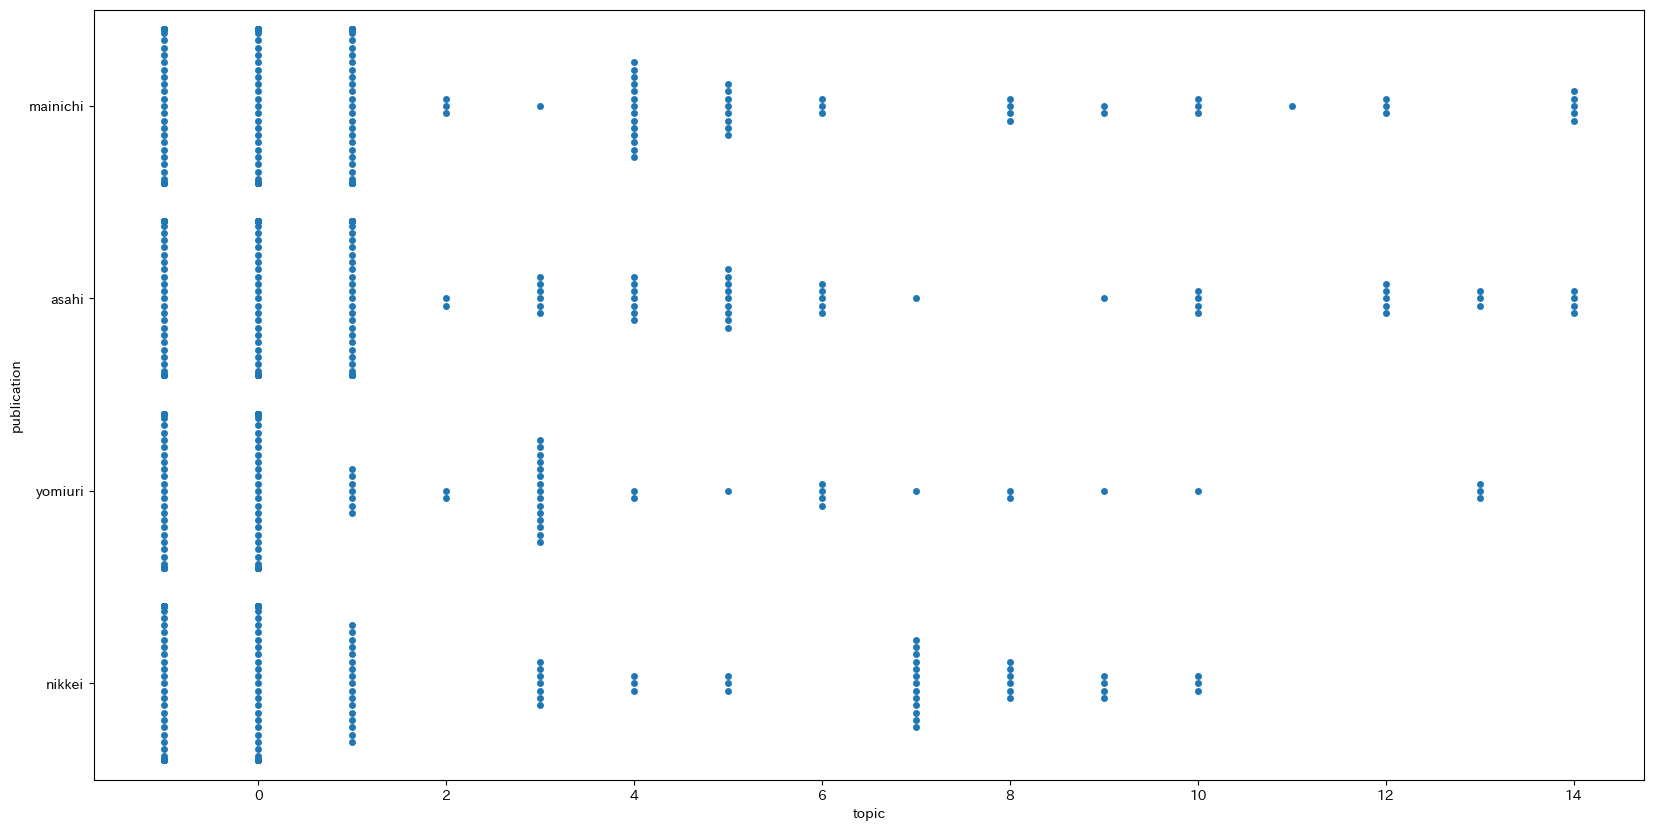

In [19]:
mini_df = articles.iloc[:1000]

fig = plt.figure(figsize=(20,10))
ax = sns.swarmplot(data=mini_df, x='topic', y='publication');


In [ ]:
##############################
## LDA Analysis with preprocessing 
##############################

texts = articles["title"] + articles["text"]

# remove ubiquitous words and unnecessary words
words = [r'新型コロナ', r'新型肺炎', r'コロナ', r'\d+面', r'\d+年', r'\d+月', r'\d+日', r'\d+時', r'\d+歳', r'\d']

texts_words_removed = remove_words(texts, words)

docs_preprocessed = make_lda_docs(texts_words_removed, lemmatize=True)

In [ ]:
print(docs_preprocessed[:5])

['神奈川 男性 国内 確認 武漢 渡航 退院 厚生 労働省 中国 武漢 市 滞在 歴 ある 神奈川 県 在住 男性 肺炎 症状 起こす 国立 感染 症 研究所 検査 新型 ウイルス 感染 確認 する 発表 する 昨年 末 武漢 発生 する いる 患者 国内 確認 する れる の 男性 退院 する 厚 労 省 男性 患者 感染 広がる 可能 性 低い する いる 首相 官邸 付 危機 管理 センター 情報 連絡 室 設置 する 関連 記事 同省 よる 男性 渡航 中 月 発熱 する 帰国 同日 国内 医療 機関 受診 する 際 軽症 発熱 続く ため 別 医療 機関 受診 する 入院 する 原因 不明 肺炎 症状 武漢 滞在 歴 ある ため 感染 研 村山 庁舎 ウイルス 検査 する 陽性 結果 出る 家族 ら 帰国 後 接触 する 人 状況 保健所 調べる いる 男性 自宅 療養 中 申告 武漢 患者 多い 出る 海鮮 市場 立ち寄る いる 現地 肺炎 患者 接触 する 可能 性 ある みる られる 男性 国籍 渡航 理由 明らか する いる 厚 労 省 検疫 所 入国 者 発熱 状況  使う 調べる いる 男性 入国 時 解熱剤 飲む いる 検査 通過 する いう 同省 武漢 市 滞在 歴 ある 発熱 症状 ある 入国 者 自己 申告 する よう 呼びかける いる ウイルス 巡る 武漢 市 現在 肺炎 患者 人 感染 確認 うち 人 重症 人 死亡 する 人 大半 野生 動物 家 きん 類 扱う 市内 海鮮 市場 頻繁 訪問 うち 数 人 市場 訪れる 家族 続く 発症 する 自身 訪問 歴 ない 現時点 世界 保健 機関 ＷＨＯ 家族 間 限定 的 人 人 感染 可能 性 否定 できる 感染 広がる リスク 低い する いる ウイルス 重症 急性 呼吸 器 症候群  中東 呼吸 器 症候群  重症 肺炎 引き起こす もの ある 死亡 率 ％ ％ ウイルス ％ 程度 厚 労 省 現在 ある 情報 限る 場合   重症 度 ない 指摘 過剰 恐れる 手洗い 感染 対策 重要 呼びかける いる 金 秀蓮 ウイルス 感染 対策 ポイント せき くしゃみ する 時 ハンカチ 袖 使う 口 鼻 押さえる せき エチケット 徹底 する 予防 インフルエンザ 対策 同様 まめ

In [44]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
# perform lda looking at 名詞，動詞，形容詞，形容動詞

n_cluster = 15
lda_model = perform_lda(texts_words_removed, n_cluster, lemmatize=True, verbose=True)

Example of original text:
 ：神奈川の男性、　国内初確認　武漢渡航、既に退院　厚生労働省は、中国の武漢市に滞在歴のある神奈川県在住の代男性が肺炎の症状を起こし、国立感染症研究所の検査で新型のウイルス感染を確認したと発表した。昨年末から武漢で発生している患者が国内で確認されたのは初めて。男性は既に退院し、厚労省は「男性患者から感染が広がる可能性は低い」としている。首相官邸は付で、危機管理センターに情報連絡室を設置した。（に関連
Parsed for LDA:
 神奈川,男性,国内,確認,武漢,渡航,退院,厚生,労働省,中国,武漢,市,滞在,歴,ある,神奈川,県,在住,男性,肺炎,症状,起こす,国立,感染,症,研究所,検査,新型,ウイルス,感染,確認,する,発表,する,昨年,末,武漢,発生,する,いる,患者,国内,確認,する,れる,の,男性,退院,する,厚,労,省,男性,患者,感染,広がる,可能,性,する,いる,首相,官邸,付,危機,管理,センター,情報,連絡,室,設置,する,関連,記事,同省,よる,男性,渡航,中,月,発熱,する,帰国,同日,国内,医療,機関,受診,する,際,軽症,発熱,続く,ため,別,医療,機関,受診,する,入院,する,原因,不明,肺炎,症状,武漢,滞在,歴,ある,ため,感染,研,村山,庁舎,ウイルス,検査,する,陽性,結果,出る,家族,ら,帰国,後,接触,する,人,状況,保健所,調べる,いる,男性,自宅,療養,中,申告,武漢,患者,出る,海鮮,市場,立ち寄る,いる,現地,肺炎,患者,接触,する,可能,性,ある,みる,られる,男性,国籍,渡航,理由,明らか,する,いる,厚,労,省,検疫,所,入国,者,発熱,状況,使う,調べる,いる,男性,入国,時,解熱剤,飲む,いる,検査,通過,する,いう,同省,武漢,市,滞在,歴,ある,発熱,症状,ある,入国,者,自己,申告,する,よう,呼びかける,いる,ウイルス,巡る,武漢,市,現在,肺炎,患者,人,感染,確認,うち,人,重症,人,死亡,する,人,大半,野生,動物,家,きん,類,扱う,市内,海鮮,市場,頻繁,訪問,うち,数,人,市場,訪れる,家族,続く,発症,する,自身,訪問,歴,現時点,世界,保健,機関,ＷＨＯ,家族,間,限定,的,人,人,感染,可能,性,否定,できる,感染,広がる,リ

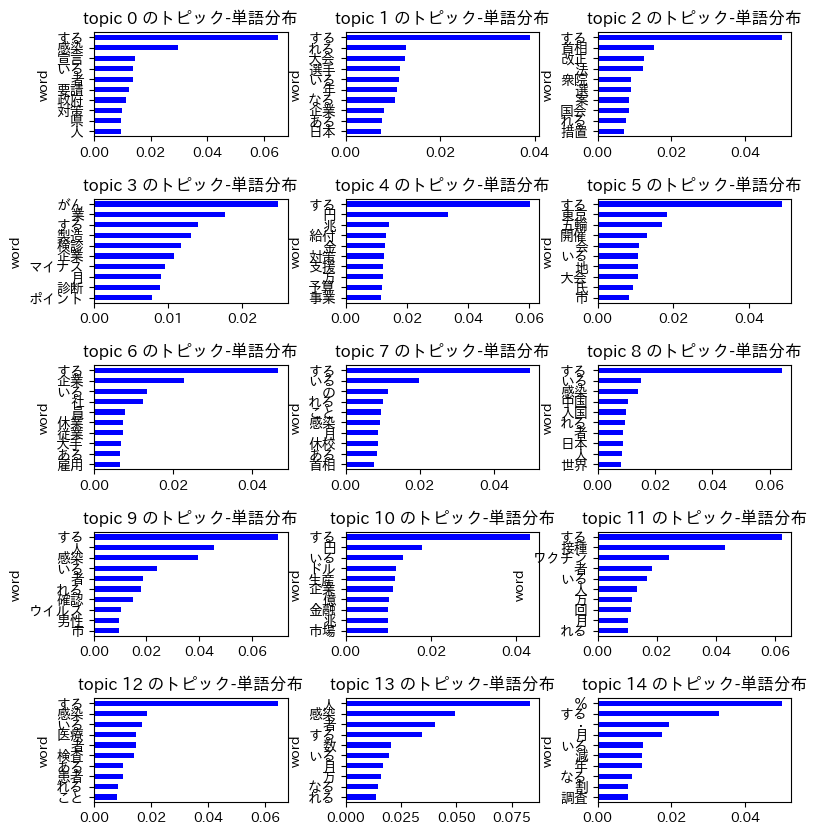

In [ ]:
lists = []
for i in range(n_cluster):
    temp_df = pd.DataFrame(lda_model.lda.show_topic(i),columns=["word","score"])
    temp_df["topic"] = i
    lists.append(temp_df)
topic_word_df = pd.concat(lists,ignore_index=True)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(9, 10),
                         gridspec_kw=dict(hspace=0.6, wspace=0.3))
for i, gdf in topic_word_df.groupby("topic"):
    gdf.set_index("word")["score"].sort_values().plot.barh(
        ax=axes[i//3, i%3],
        title="topic {} のトピック-単語分布".format(i),
        color="blue")



In [ ]:
topic_word_df["rank"] = topic_word_df.groupby("topic")["score"].rank()
topic_word_df.pivot(index='topic', columns='rank', values='word')

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
topic,,,,,,,,,,
0,人,県,対策,政府,要請,者,いる,宣言,感染,する
1,日本,ある,企業,なる,年,いる,選手,大会,れる,する
2,措置,れる,国会,案,選,衆院,法,改正,首相,する
3,ポイント,診断,月,マイナス,企業,検診,製造,する,業,がん
4,事業,予算,万,支援,対策,金,給付,兆,円,する
5,市,氏,大会,地,いる,会,開催,五輪,東京,する
6,雇用,ある,大手,従業,休業,員,社,いる,企業,する
7,首相,ある,休校,月,感染,こと,れる,の,いる,する
8,世界,人,日本,者,れる,入国,中国,感染,いる,する


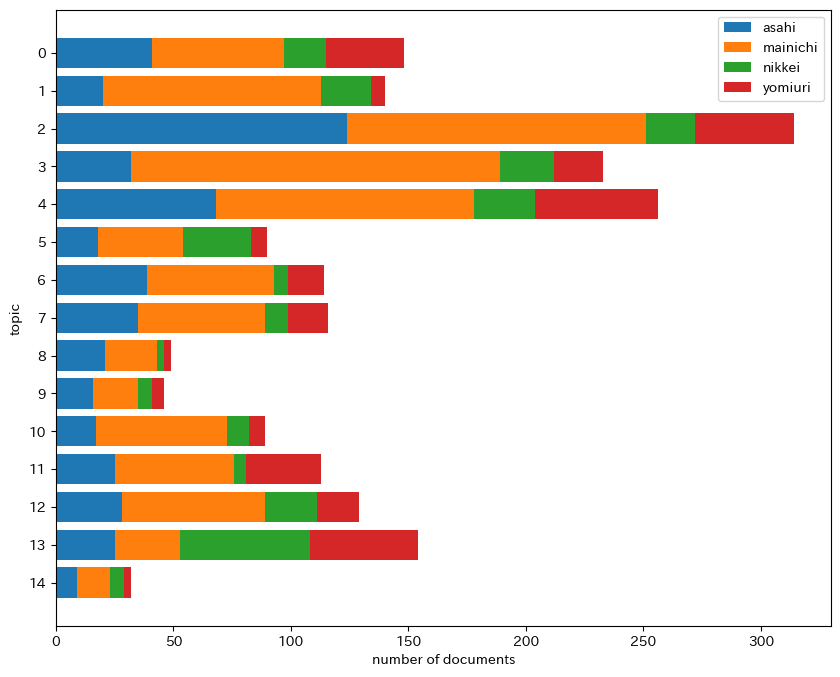

In [ ]:
articles_predict = articles.copy()
# topicの付与
articles_predict["pred_topic"] = np.argmax(lda_model.corpus_arr,axis=1)
articles_predict["score"] = np.max(lda_model.corpus_arr,axis=1)
cross = pd.crosstab(articles_predict["publication"],articles_predict["pred_topic"])
# トピックの文書割合の可視化
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(cross)):
    ax.barh(y=cross.columns, width = cross.iloc[i].values[::-1], left=cross.iloc[:i].sum()[::-1].values,tick_label=cross.columns[::-1])
ax.set(xlabel='number of documents', ylabel='topic')
ax.legend(cross.index)
plt.show()

In [48]:
###################
## change parameters for lda 
###################  

texts = articles["title"] + articles["text"]

words = [r'新型コロナ', r'新型肺炎', r'コロナ', r'\d+面', r'\d+年', r'\d+月', r'\d+日', r'\d+時', r'\d+歳', r'％', r'\d+'] # remove digits

texts_words_removed = remove_words(texts, words)

In [ ]:
texts_words_removed[0]

In [49]:
# perform lda looking only at 名詞，形容詞，形容動詞 with lemmatization 
n_cluster = 15
keep_pos0 = ["名詞", "副詞", "形容詞"]
remove_pos1 = ["数", "非自立", "接尾", "副詞可能", "助詞類接続"]
lda_model = perform_lda(texts_words_removed, n_cluster, keep_pos0=keep_pos0, remove_pos1=remove_pos1, lemmatize=True, verbose=True)

Example of original text:
 ：神奈川の男性、　国内初確認　武漢渡航、既に退院　厚生労働省は、中国の武漢市に滞在歴のある神奈川県在住の代男性が肺炎の症状を起こし、国立感染症研究所の検査で新型のウイルス感染を確認したと発表した。昨年末から武漢で発生している患者が国内で確認されたのは初めて。男性は既に退院し、厚労省は「男性患者から感染が広がる可能性は低い」としている。首相官邸は付で、危機管理センターに情報連絡室を設置した。（に関連
Parsed for LDA:
 神奈川,男性,国内,確認,武漢,渡航,既に,退院,厚生,労働省,中国,武漢,滞在,神奈川,在住,男性,肺炎,症状,国立,感染,研究所,検査,新型,ウイルス,感染,確認,発表,武漢,発生,患者,国内,確認,初めて,男性,既に,退院,厚,労,男性,患者,感染,可能,低い,首相,官邸,付,危機,管理,センター,情報,連絡,設置,関連,記事,同省,男性,渡航,発熱,帰国,国内,医療,機関,受診,軽症,発熱,別,医療,機関,受診,入院,原因,不明,肺炎,症状,武漢,滞在,感染,村山,庁舎,ウイルス,検査,陽性,家族,帰国,接触,人,状況,保健所,男性,自宅,療養,申告,武漢,患者,多い,海鮮,市場,現地,肺炎,患者,接触,可能,男性,国籍,渡航,理由,明らか,厚,労,検疫,入国,発熱,状況,男性,入国,解熱剤,検査,通過,同省,武漢,滞在,発熱,症状,入国,自己,申告,ウイルス,武漢,肺炎,患者,感染,確認,うち,重症,人,死亡,人,大半,野生,動物,家,きん,市内,海鮮,市場,頻繁,訪問,うち,市場,家族,発症,自身,訪問,ない,現時点,世界,保健,機関,ＷＨＯ,家族,限定,人,人,感染,可能,否定,感染,リスク,低い,ウイルス,重症,急性,呼吸,症候群,中東,呼吸,症候群,重症,肺炎,死亡,ウイルス,程度,厚,労,情報,重症,ない,指摘,過剰,手洗い,感染,対策,重要,金,秀蓮,ウイルス,感染,対策,ポイント,せき,くしゃみ,ハンカチ,袖,口,鼻,せき,エチケット,徹底,予防,インフルエンザ,対策,同様,まめ,手洗い,武漢,帰国,入国,人,せき,発熱,症状,マスク,着用,速やか,医療,機関,受診,武漢,滞在,申告,厚生,労働省,資料


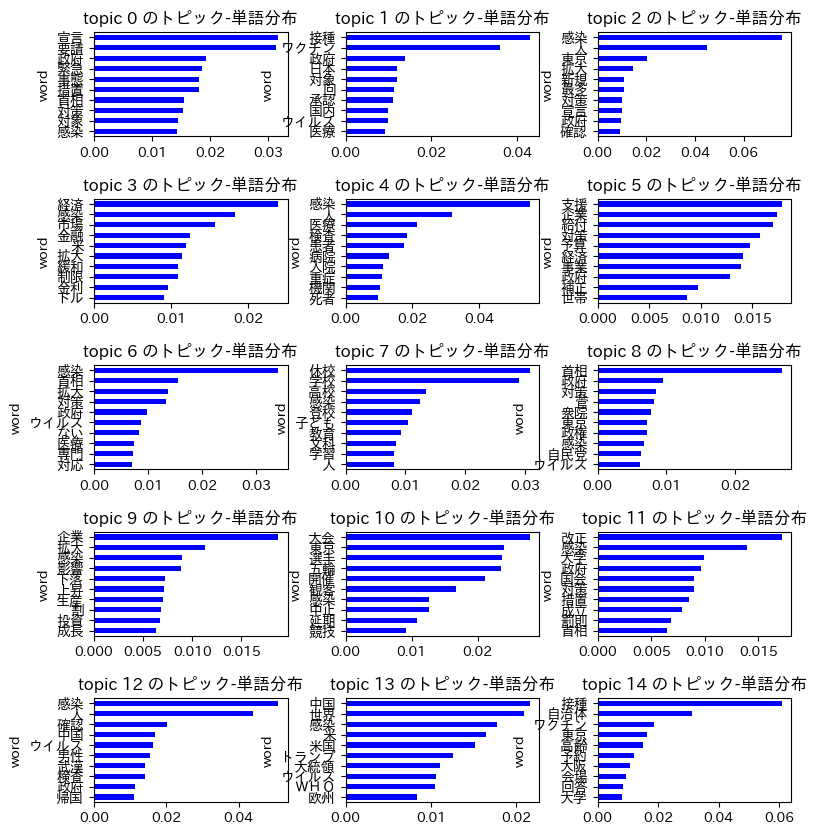

In [25]:
lists = []
for i in range(n_cluster):
    temp_df = pd.DataFrame(lda_model.lda.show_topic(i),columns=["word","score"])
    temp_df["topic"] = i
    lists.append(temp_df)
topic_word_df = pd.concat(lists,ignore_index=True)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(9, 10),
                         gridspec_kw=dict(hspace=0.6, wspace=0.3))
for i, gdf in topic_word_df.groupby("topic"):
    gdf.set_index("word")["score"].sort_values().plot.barh(
        ax=axes[i//3, i%3],
        title="topic {} のトピック-単語分布".format(i),
        color="blue")

In [26]:
topic_word_df["rank"] = topic_word_df.groupby("topic")["score"].rank()
topic_word_df.pivot(index='topic', columns='rank', values='word')

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
topic,,,,,,,,,,
0,感染,対象,対策,首相,措置,事態,緊急,政府,要請,宣言
1,医療,ウイルス,国内,承認,回,対象,日本,政府,ワクチン,接種
2,確認,政府,宣言,対策,最多,新規,拡大,東京,人,感染
3,ドル,金利,制限,緩和,拡大,米,金融,市場,感染,経済
4,死者,機関,重症,入院,病院,患者,検査,医療,人,感染
5,世帯,補正,政府,事業,経済,予算,対策,給付,企業,支援
6,対応,専門,医療,ない,ウイルス,政府,対策,拡大,首相,感染
7,人,学習,文科,教育,子ども,登校,感染,高校,学校,休校
8,ウイルス,自民党,感染,政権,東京,衆院,菅,対策,政府,首相


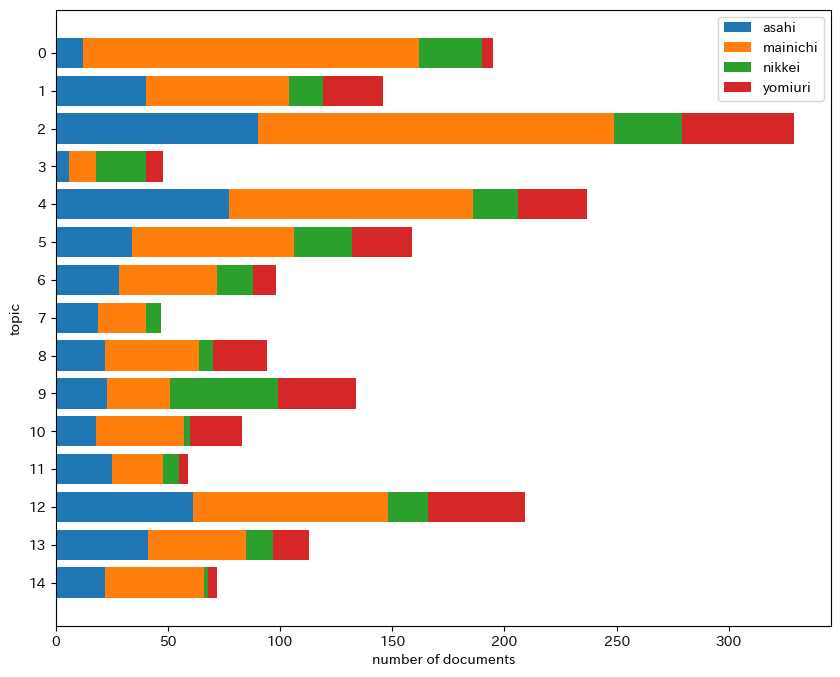

In [27]:
articles_predict = articles.copy()
# topicの付与
articles_predict["pred_topic"] = np.argmax(lda_model.corpus_arr,axis=1)
articles_predict["score"] = np.max(lda_model.corpus_arr,axis=1)
cross = pd.crosstab(articles_predict["publication"],articles_predict["pred_topic"])
# トピックの文書割合の可視化
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(cross)):
    ax.barh(y=cross.columns, width = cross.iloc[i].values[::-1], left=cross.iloc[:i].sum()[::-1].values,tick_label=cross.columns[::-1])
ax.set(xlabel='number of documents', ylabel='topic')
ax.legend(cross.index)
plt.show()

In [32]:
pyLDAvis.display(lda_model.viz)

In [51]:
# check coherence to find optimal topic number 

texts = articles['title'] + articles['text']

words = [r'新型コロナ', r'新型肺炎', r'コロナ', r'\d+面', r'\d+日', r'\d+時', r'\d+歳', r'％', r'\d+'] # remove digits

texts_words_removed = remove_words(texts, words)

coherence = []
for n_cluster in range(6,25):
    # perform lda looking only at 名詞，形容詞，形容動詞 with lemmatization 
    keep_pos0 = ["名詞", "副詞", "形容詞"]
    remove_pos1 = ["数", "非自立", "接尾", "副詞可能", "助詞類接続"]
    lda_model = perform_lda(texts_words_removed, n_cluster, keep_pos0=keep_pos0, remove_pos1=remove_pos1, lemmatize=True)
    cv = lda_model.coherence.get_coherence()
    print(f'Round {n_cluster}: Coherence is {cv}')
    coherence.append((n_cluster, cv))

Round 6: Coherence is 0.44852217967414804
Round 7: Coherence is 0.4513777960204508
Round 8: Coherence is 0.45315954332985053
Round 9: Coherence is 0.45092611459132026
Round 10: Coherence is 0.4558122132864634
Round 11: Coherence is 0.4339608159026365
Round 12: Coherence is 0.46710672521065355
Round 13: Coherence is 0.43874851013938204
Round 14: Coherence is 0.4342248214717085
Round 15: Coherence is 0.4644321779471438
Round 16: Coherence is 0.45611486077991614
Round 17: Coherence is 0.47190204261074664
Round 18: Coherence is 0.4870545334302531
Round 19: Coherence is 0.49436720114572386
Round 20: Coherence is 0.4747594829647367
Round 21: Coherence is 0.46454947010738057
Round 22: Coherence is 0.49413834830047
Round 23: Coherence is 0.48706798237513027
Round 24: Coherence is 0.5042003579038022


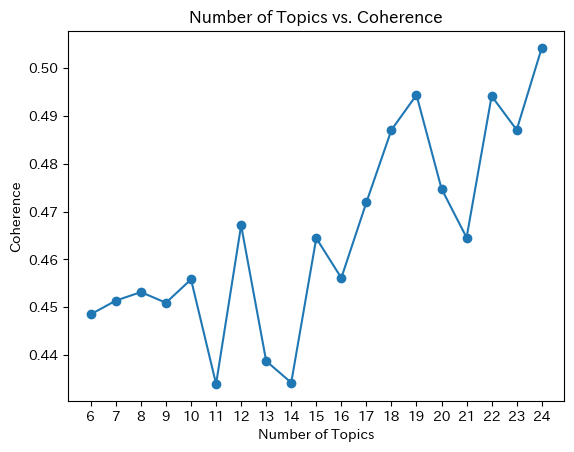

In [52]:
x, y = zip(*coherence)
plt.plot(x, y)
plt.scatter(x, y)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x)
plt.show()

In [53]:
# perform lda looking only at 名詞，形容詞，形容動詞 with lemmatization 
n_cluster = 19
keep_pos0 = ["名詞", "副詞", "形容詞"]
remove_pos1 = ["数", "非自立", "接尾", "副詞可能", "助詞類接続"]
lda_model = perform_lda(texts_words_removed, n_cluster, keep_pos0=keep_pos0, remove_pos1=remove_pos1, lemmatize=True, verbose=True)

Example of original text:
 ：神奈川の男性、　国内初確認　武漢渡航、既に退院　厚生労働省は、中国の武漢市に滞在歴のある神奈川県在住の代男性が肺炎の症状を起こし、国立感染症研究所の検査で新型のウイルス感染を確認したと発表した。昨年末から武漢で発生している患者が国内で確認されたのは初めて。男性は既に退院し、厚労省は「男性患者から感染が広がる可能性は低い」としている。首相官邸は付で、危機管理センターに情報連絡室を設置した。（に関連
Parsed for LDA:
 神奈川,男性,国内,確認,武漢,渡航,既に,退院,厚生,労働省,中国,武漢,滞在,神奈川,在住,男性,肺炎,症状,国立,感染,研究所,検査,新型,ウイルス,感染,確認,発表,武漢,発生,患者,国内,確認,初めて,男性,既に,退院,厚,労,男性,患者,感染,可能,低い,首相,官邸,付,危機,管理,センター,情報,連絡,設置,関連,記事,同省,男性,渡航,月,発熱,帰国,国内,医療,機関,受診,軽症,発熱,別,医療,機関,受診,入院,原因,不明,肺炎,症状,武漢,滞在,感染,村山,庁舎,ウイルス,検査,陽性,家族,帰国,接触,人,状況,保健所,男性,自宅,療養,申告,武漢,患者,多い,海鮮,市場,現地,肺炎,患者,接触,可能,男性,国籍,渡航,理由,明らか,厚,労,検疫,入国,発熱,状況,男性,入国,解熱剤,検査,通過,同省,武漢,滞在,発熱,症状,入国,自己,申告,ウイルス,武漢,肺炎,患者,感染,確認,うち,重症,人,死亡,人,大半,野生,動物,家,きん,市内,海鮮,市場,頻繁,訪問,うち,市場,家族,発症,自身,訪問,ない,現時点,世界,保健,機関,ＷＨＯ,家族,限定,人,人,感染,可能,否定,感染,リスク,低い,ウイルス,重症,急性,呼吸,症候群,中東,呼吸,症候群,重症,肺炎,死亡,ウイルス,程度,厚,労,情報,重症,ない,指摘,過剰,手洗い,感染,対策,重要,金,秀蓮,ウイルス,感染,対策,ポイント,せき,くしゃみ,ハンカチ,袖,口,鼻,せき,エチケット,徹底,予防,インフルエンザ,対策,同様,まめ,手洗い,武漢,帰国,入国,人,せき,発熱,症状,マスク,着用,速やか,医療,機関,受診,武漢,滞在,申告,厚生,労働省,資料


In [64]:
lda_model.coherence.get_coherence()

0.49436720114572386

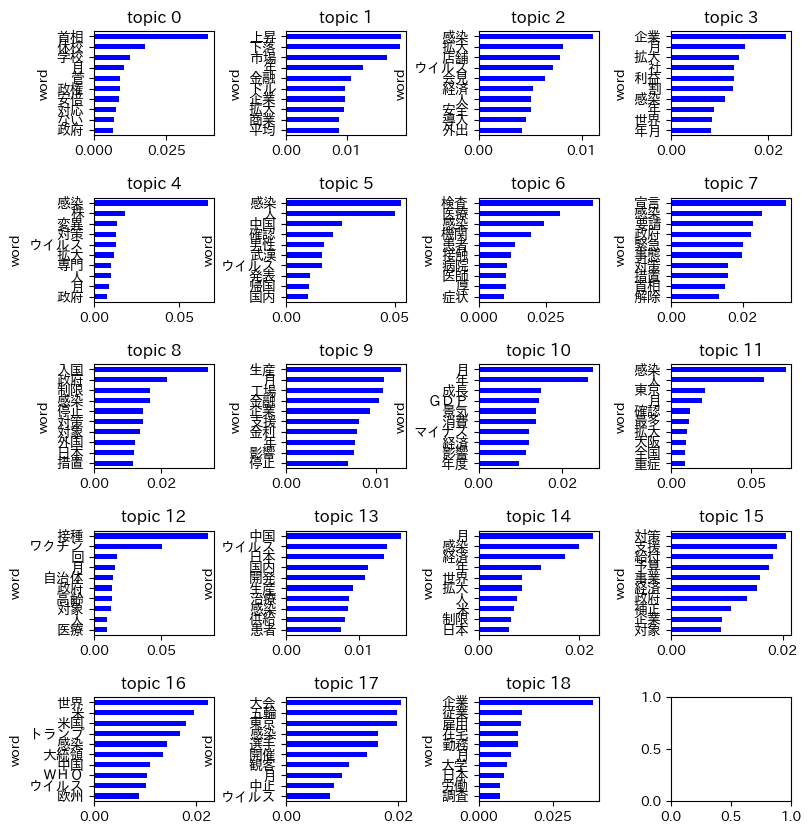

In [62]:
lists = []
for i in range(n_cluster):
    temp_df = pd.DataFrame(lda_model.lda.show_topic(i),columns=["word","score"])
    temp_df["topic"] = i
    lists.append(temp_df)
topic_word_df = pd.concat(lists,ignore_index=True)

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(9, 10),
                         gridspec_kw=dict(hspace=0.6, wspace=0.6))
for i, gdf in topic_word_df.groupby("topic"):
    gdf.set_index("word")["score"].sort_values().plot.barh(
        ax=axes[i//4, i%4],
        title="topic {}".format(i),
        color="blue")

In [65]:
topic_word_df["rank"] = topic_word_df.groupby("topic")["score"].rank()
topic_word_df.pivot(index='topic', columns='rank', values='word')

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
topic,,,,,,,,,,
0,政府,ない,対応,安倍,政権,菅,月,学校,休校,首相
1,平均,商業,拡大,企業,ドル,金融,年,市場,下落,上昇
2,外出,導入,安全,人,経済,会見,ウイルス,店舗,拡大,感染
3,年月,世界,年,感染,割,利益,社,拡大,月,企業
4,政府,月,人,専門,拡大,ウイルス,対策,変異,株,感染
5,国内,帰国,発表,ウイルス,武漢,男性,確認,中国,人,感染
6,症状,厚,医師,病院,接触,患者,機関,感染,医療,検査
7,解除,首相,措置,対策,事態,緊急,政府,要請,感染,宣言
8,措置,日本,外国,対象,対策,停止,感染,制限,政府,入国


In [67]:
articles_predict.tail()

,date,title,text,publication,topic,pred_topic,score
2018,2021-12-29,遠山元公明議員、在宅起訴 コロナ融資など仲介 無登録で１１１件,公明党の国会議員２人の事務所が日本政策金融公庫のコロナ融資などの仲介を無登録で繰り返していた...,asahi,-1,12,0.490907
2019,2021-12-29,新型コロナ：新型コロナ 「オミクロン株、急拡大も」 専門家組織、対策呼びかけ,厚生労働省に新型コロナウイルス感染症対策を助言する専門家組織「アドバイザリーボード（ＡＢ）...,mainichi,-1,4,0.790340
2020,2021-12-29,新型コロナ：新型コロナ 首相「先手対応」,岸田文雄首相は２８日、新型コロナウイルスに関する関係閣僚会合を首相官邸で開き、年末年始の対...,mainichi,0,0,0.297463
2021,2021-12-30,世界の感染最多、９３万人、１カ月で６割増、死者数は横ばい。,【ヒューストン＝花房良祐】米欧を中心に世界で新型コロナウイルスの感染拡大が続いている。米ジ...,nikkei,0,2,0.415936
2022,2021-12-31,余録：五輪も政権もコロナに翻弄された２０２１年…,五輪も政権もコロナに翻弄（ほんろう）された２０２１年。いろはカルタで振り返る。【い】いけー...,mainichi,-1,9,0.761131
